# Welcome to the "Loan Applicant Data for Credit Risk Analysis" dataset on Kaggle! This dataset provides essential information about loan applicants and their characteristics. Your task is to develop predictive models to determine the likelihood of loan default based on these simplified features.

In [106]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

In [107]:
df = pd.read_csv(r"C:\Users\mayur\Downloads\credit_risk.csv")

In [108]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [110]:
df.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [111]:
#checking null values
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [112]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


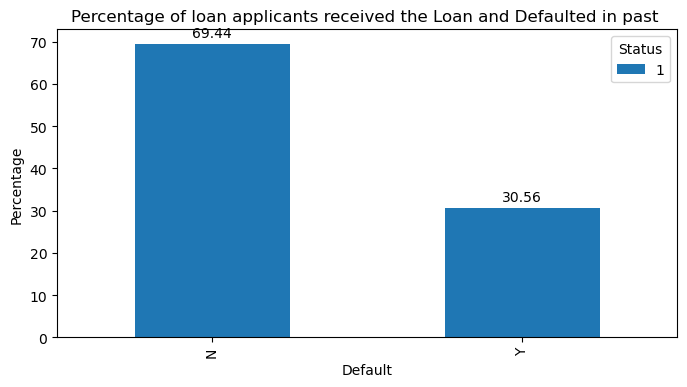

In [114]:
plt.figure(figsize=(8, 4))
plt.title('Percentage of loan applicants received the Loan with respect to Default in past ')
plt.ylabel('Percentage')
bars = (pd.crosstab(df[df['Status']==1]['Default'], df[df['Status']==1]['Status'],normalize=True)*100).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

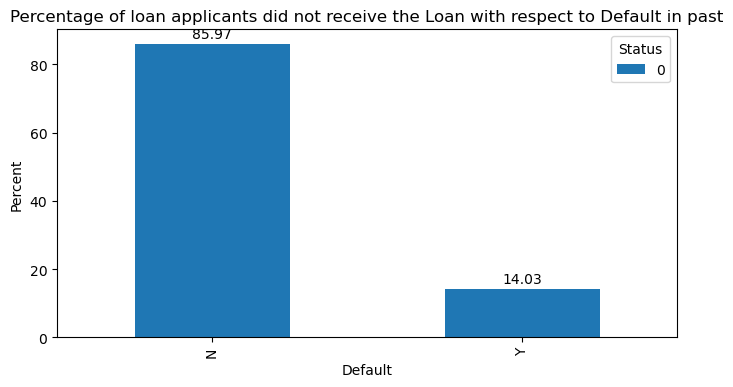

In [116]:
plt.figure(figsize=(8, 4))
plt.title('Percentage of loan applicants did not receive the Loan with respect to Default in past')
plt.ylabel('Percent')
bars = (pd.crosstab(df[df['Status']==0]['Default'], df[df['Status']==0]['Status'],normalize=True)*100).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

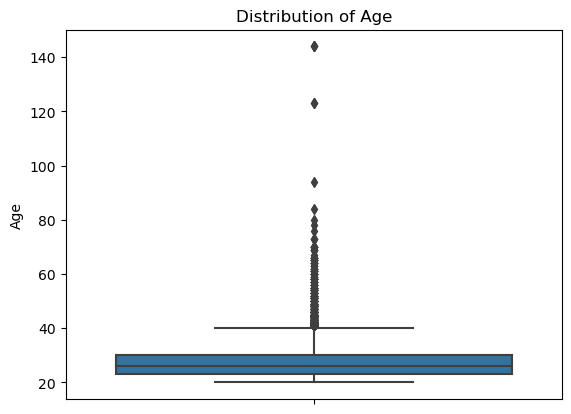

In [58]:
sns.boxplot(y='Age', data=df)
plt.title('Distribution of Age')
plt.show()

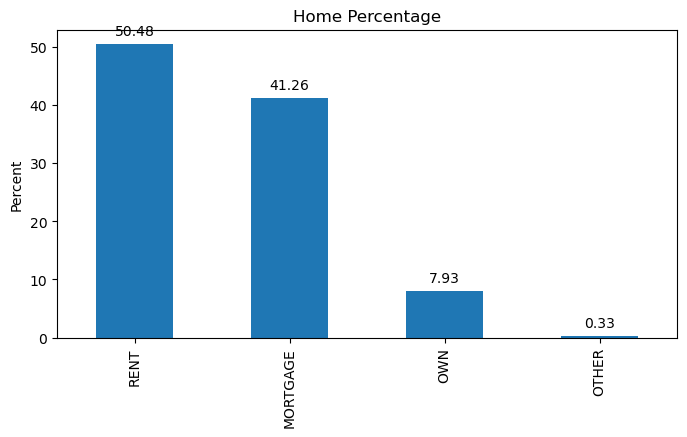

In [59]:
plt.figure(figsize=(8, 4))
plt.title('Home Percentage')
plt.ylabel('Percent')
bars=(df.Home.value_counts()*100/len(df)).plot(kind='bar')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

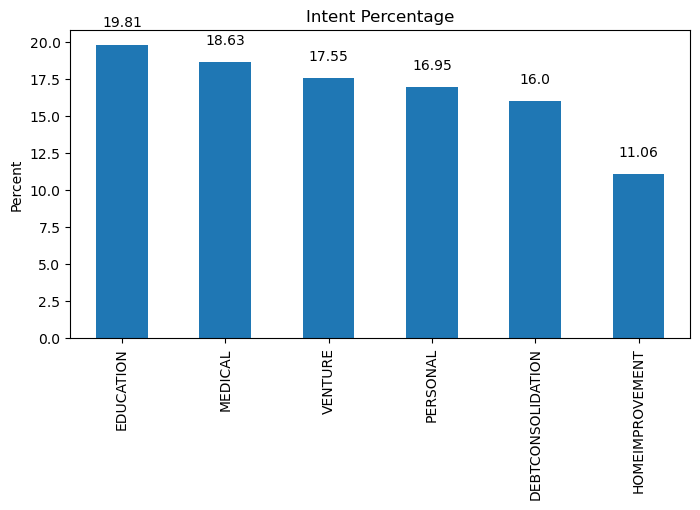

In [60]:
plt.figure(figsize=(8, 4))
plt.title('Intent Percentage')
plt.ylabel('Percent')
bars=(df.Intent.value_counts()*100/len(df)).plot(kind='bar')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

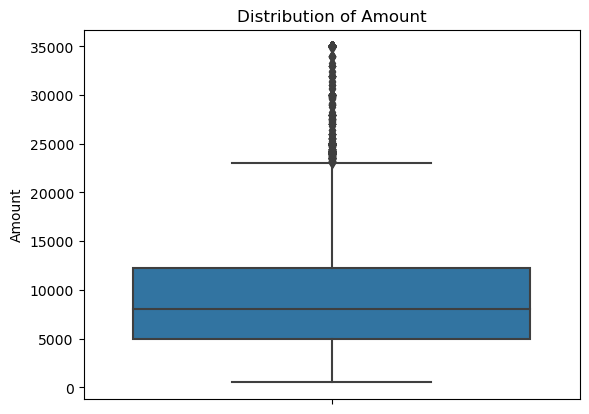

In [61]:
sns.boxplot(y='Amount', data=df)
plt.title('Distribution of Amount')
plt.show()

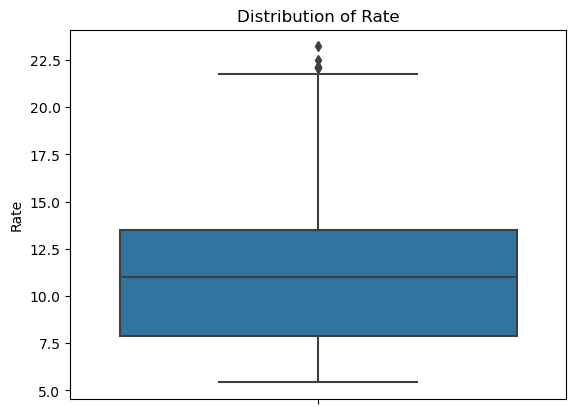

In [62]:
sns.boxplot(y='Rate', data=df)
plt.title('Distribution of Rate')
plt.show()

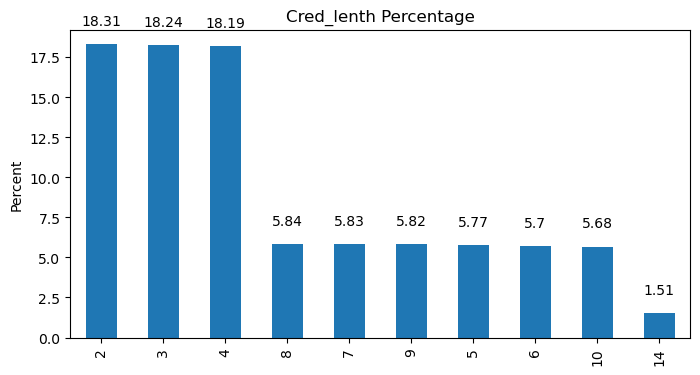

In [63]:
plt.figure(figsize=(8, 4))
plt.title('Cred_lenth Percentage')
plt.ylabel('Percent')
bars=(df.Cred_length.value_counts()*100/len(df)).head(10).plot(kind='bar')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

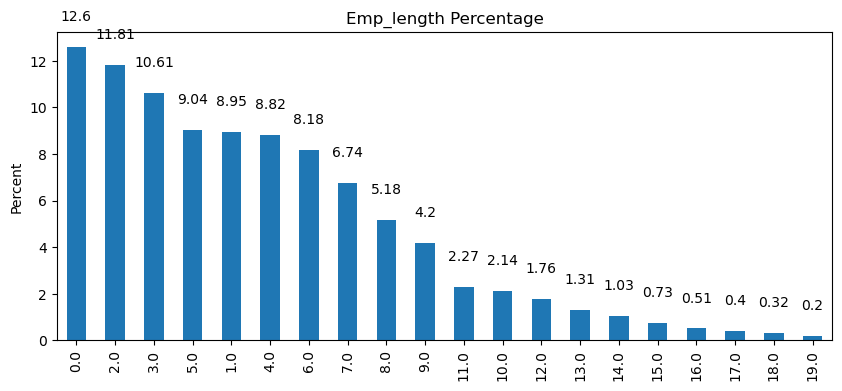

In [64]:
plt.figure(figsize=(10, 4))
plt.title('Emp_length Percentage')
plt.ylabel('Percent')
bars=(df.Emp_length.value_counts()*100/len(df)).head(20).plot(kind='bar')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

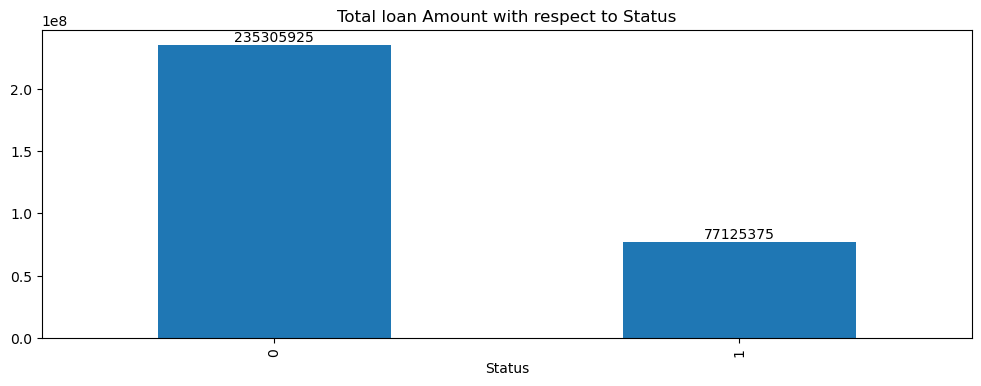

In [65]:
# Calculate total amount for Status==1
total_amount_status_1 = (df['Amount'].sum())

# Calculate proportions for each 'Home' category
proportions = (df.groupby('Status')['Amount'].sum())

# Plotting
ax = proportions.plot(kind='bar', figsize=(12, 4))
plt.title('Total loan Amount with respect to Status')
plt.ylabel('')

# Adding text labels to bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


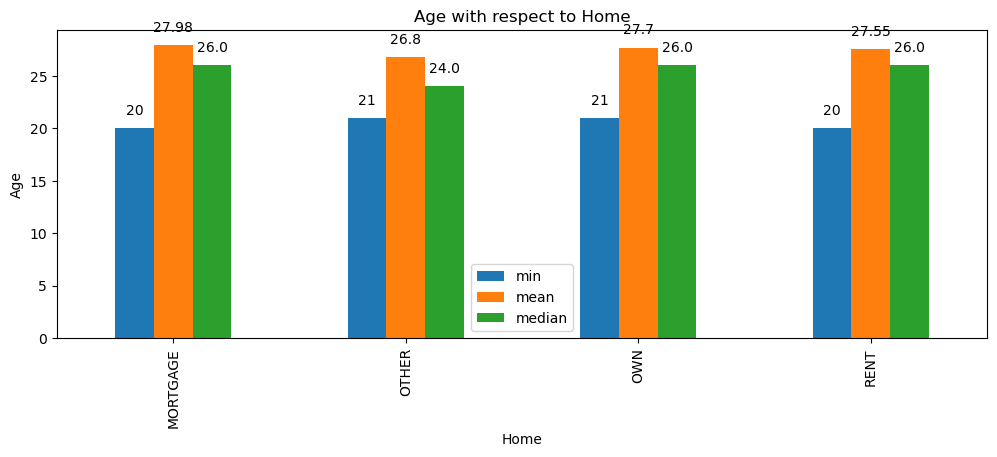

In [117]:
plt.figure(figsize=(12, 4))
plt.title('Age with respect to Home')
plt.ylabel('Age')
bars=df.groupby('Home')['Age'].agg(['min', 'mean','median']).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

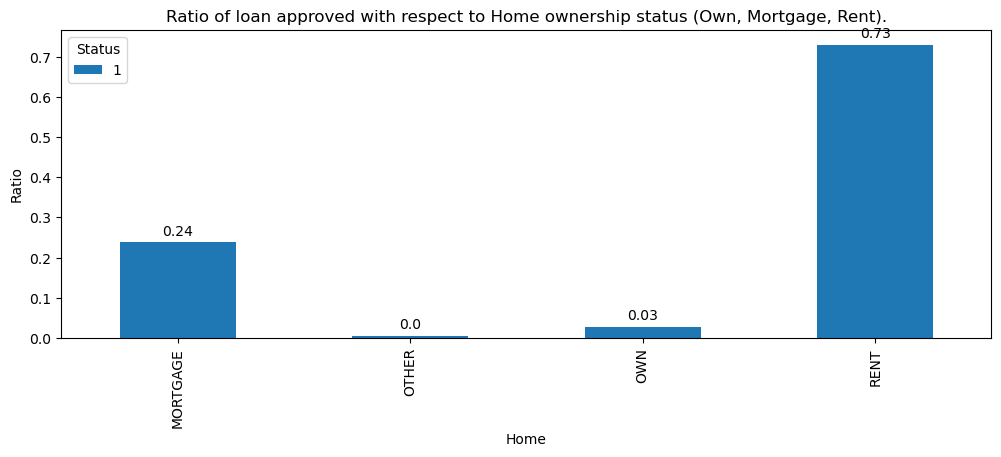

In [118]:
ax = pd.crosstab(df[df['Status']==1]['Home'], df[df['Status']==1]['Status'], values=df[df['Status']==1]['Id'], aggfunc='count', normalize="columns").plot(kind='bar', figsize=(12, 4))

plt.title('Ratio of loan approved with respect to Home ownership status (Own, Mortgage, Rent).')
plt.ylabel('Ratio')

# Adding text labels to bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


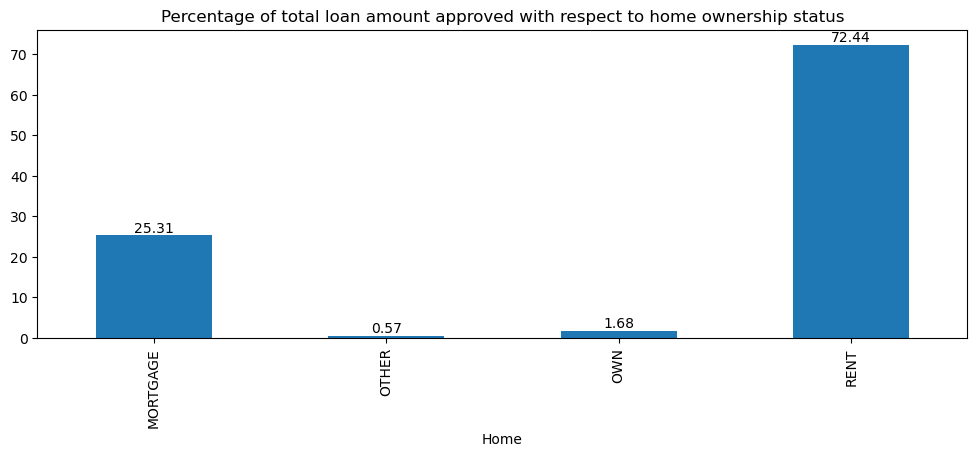

In [119]:
# Calculate total amount for Status==1
total_amount_status_1 = (df[df['Status'] == 1]['Amount'].sum())

# Calculate proportions for each 'Home' category
proportions = (df[df['Status'] == 1].groupby('Home')['Amount'].sum())*100 / total_amount_status_1

# Plotting
ax = proportions.plot(kind='bar', figsize=(12, 4))
plt.title('Percentage of total loan amount approved with respect to home ownership status')
plt.ylabel('')

# Adding text labels to bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


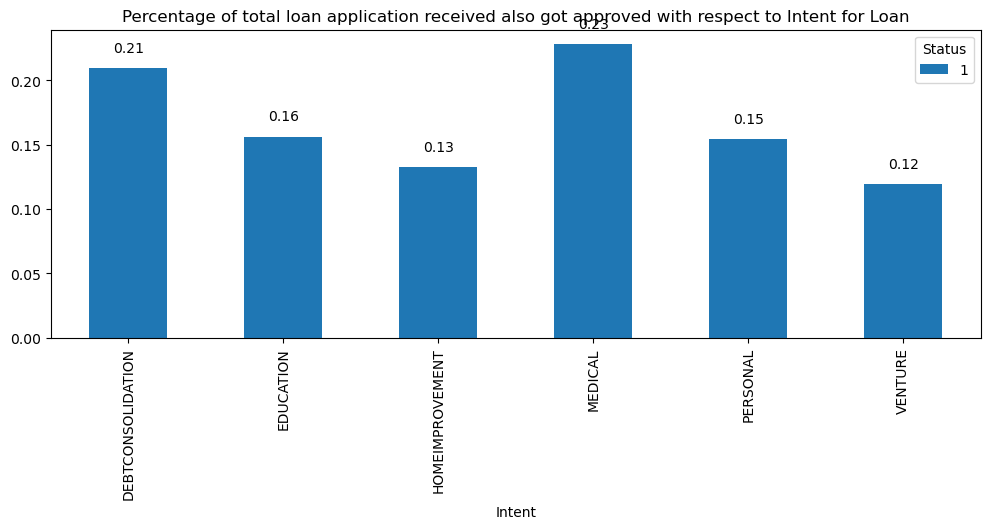

In [121]:
ax = pd.crosstab(df[df['Status']==1]['Intent'], df[df['Status']==1]['Status'], values=df[df['Status']==1]['Id'], aggfunc='count', normalize="columns").plot(kind='bar', figsize=(12, 4))

plt.title('Percentage of total loan application received also got approved with respect to Intent for Loan')
plt.ylabel('')
# Adding text labels to bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


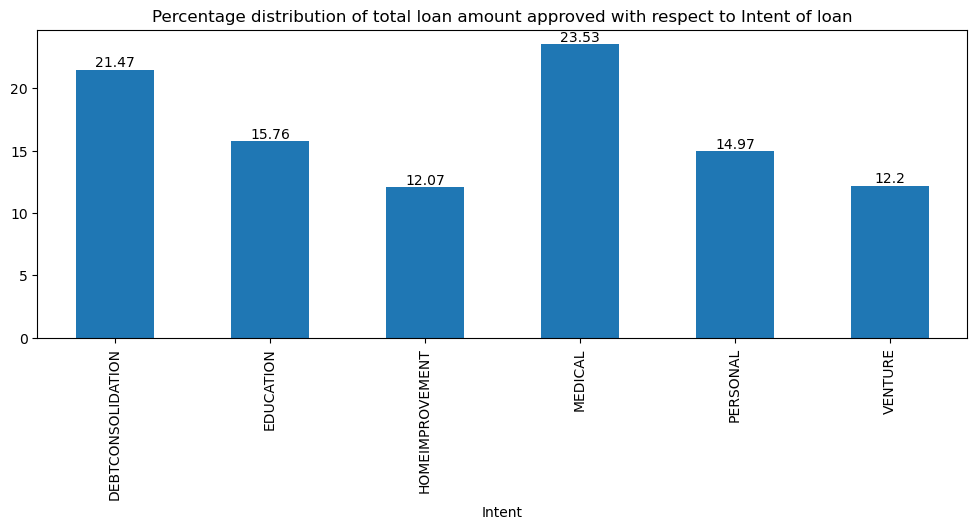

In [123]:
# Calculate total amount for Status==1
total_amount_status_1 = (df[df['Status'] == 1]['Amount'].sum())

# Calculate proportions for each 'Home' category
proportions = (df[df['Status'] == 1].groupby('Intent')['Amount'].sum())*100 / total_amount_status_1

# Plotting
ax = proportions.plot(kind='bar', figsize=(12, 4))
plt.title('Percentage distribution of total loan amount approved with respect to Intent of loan')
plt.ylabel('')

# Adding text labels to bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


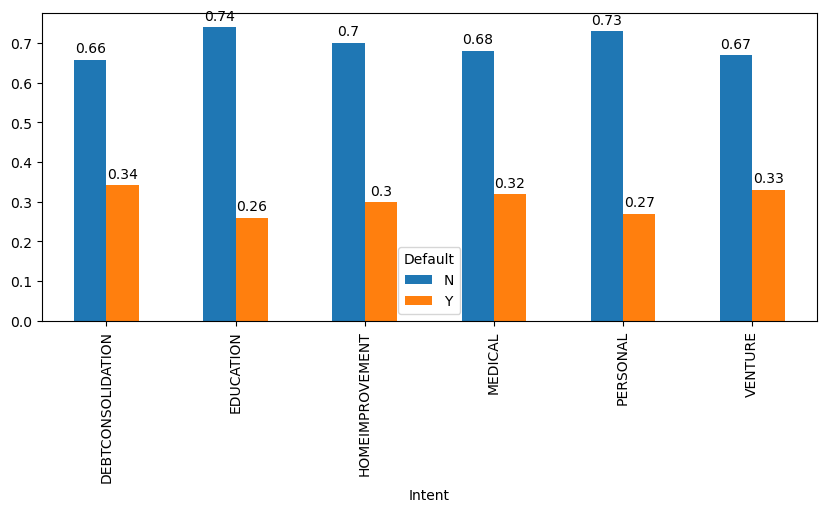

In [72]:
plt.figure(figsize=(10, 4))
plt.title('')
plt.ylabel('')

# Create the crosstab and plot it on the current axis
bars_df = pd.crosstab(df[df['Status'] == 1]['Intent'], df[df['Status'] == 1]['Default'], normalize="index")
ax = bars_df.plot(kind='bar', ax=plt.gca())

# Adding text labels to bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

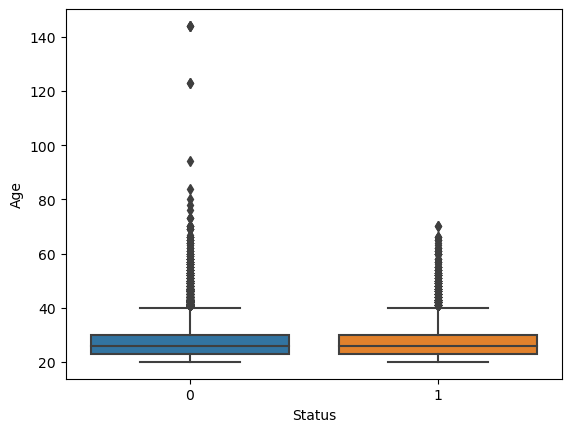

In [73]:
sns.boxplot(x='Status',y='Age', data=df)
plt.title('')
plt.show()

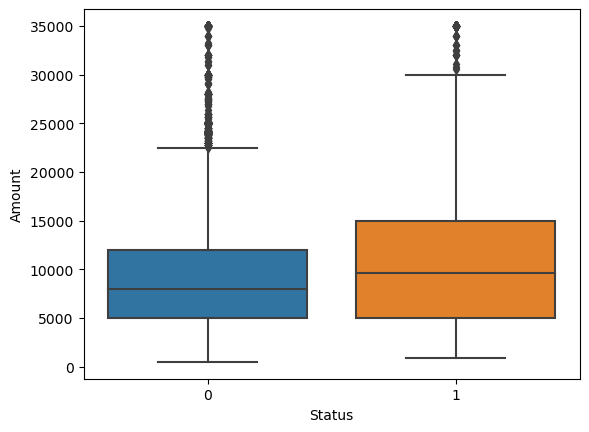

In [74]:
sns.boxplot(x='Status',y='Amount', data=df)
plt.title('')
plt.show()

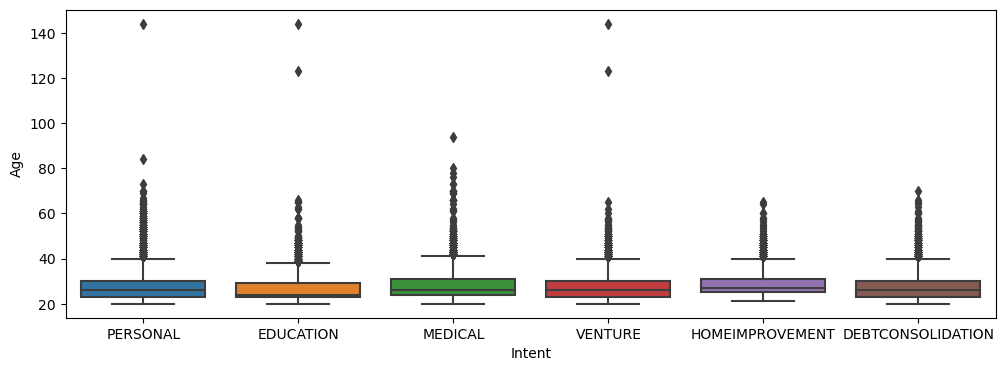

In [75]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Intent',y='Age', data=df)
plt.title('')
plt.show()

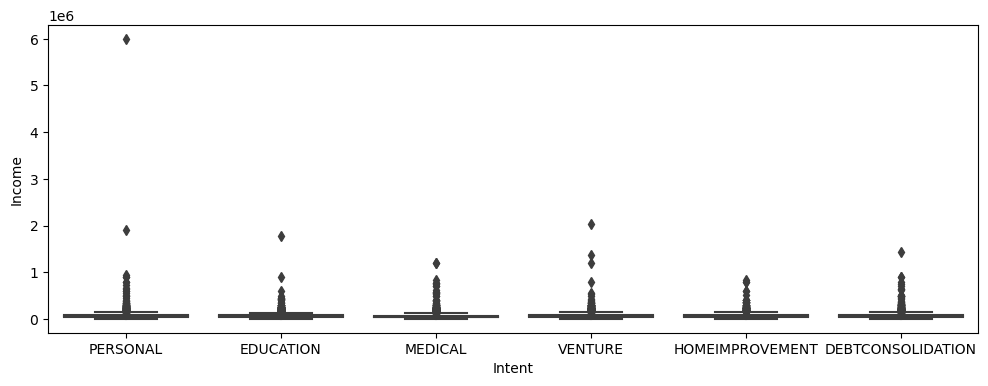

In [76]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Intent',y='Income', data=df)
plt.title('')
plt.show()

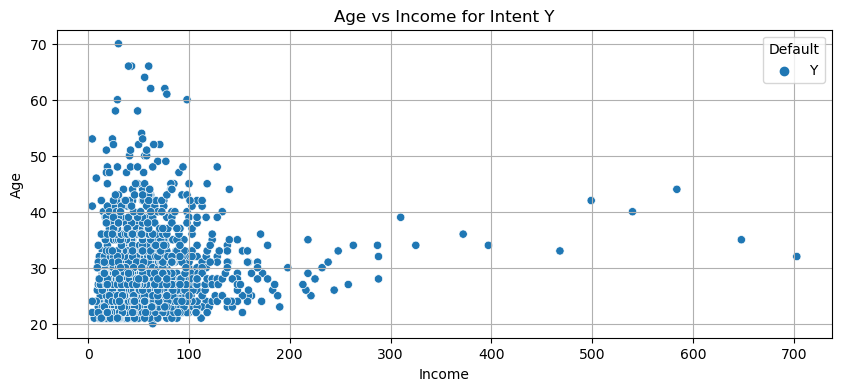

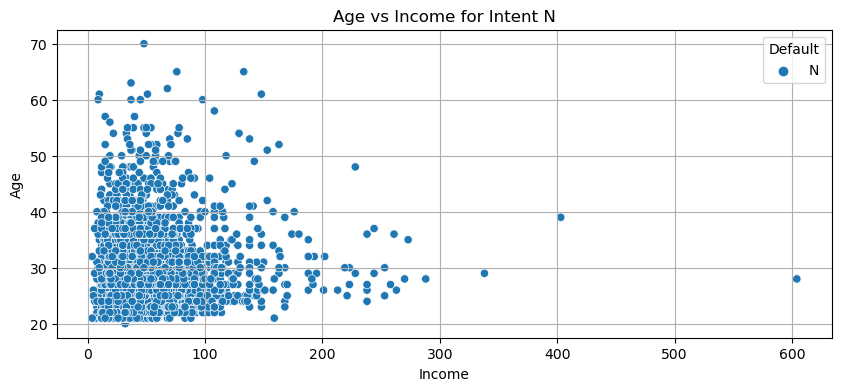

In [77]:
Default = df['Default'].unique()

for Default in Default:
    subset = df[(df['Default'] == Default) & (df['Status'] == 1)]

    plt.figure(figsize=(10, 4))
    sns.scatterplot(y=subset['Age'], x=subset['Income']//1000, hue=subset['Default'], data=subset)
    plt.title(f'Age vs Income for Intent {Default}')
    plt.grid(True)
    plt.show()


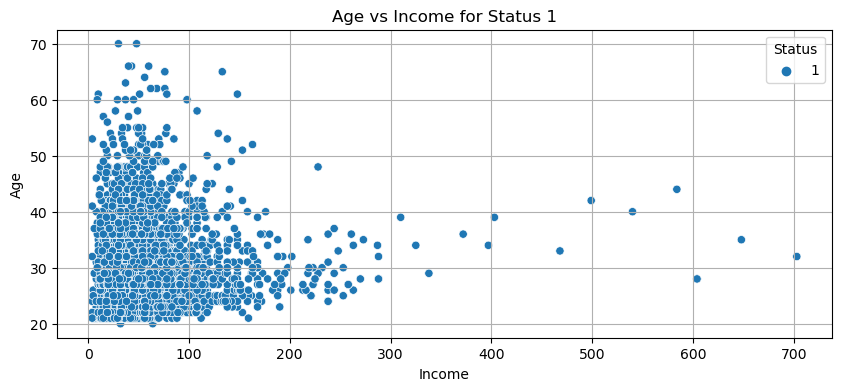

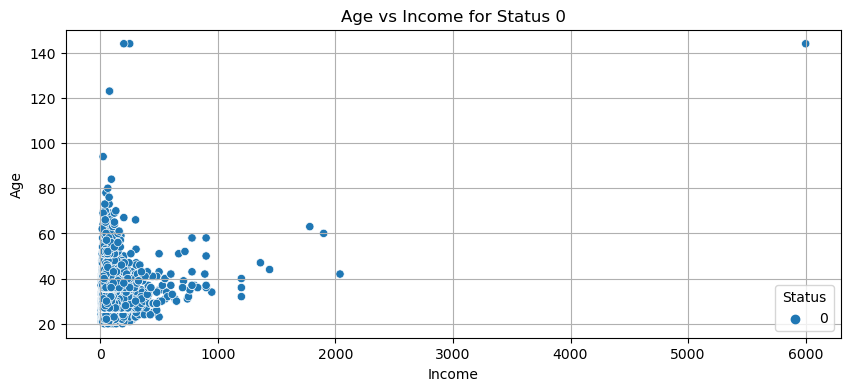

In [78]:
Status = df['Status'].unique()

for Status in Status:
    subset = df[df['Status'] == Status]
    plt.figure(figsize=(10, 4))
    sns.scatterplot(y=subset['Age'], x=subset['Income']//1000, hue=subset['Status'], data=subset)
    plt.title(f'Age vs Income for Status {Status}')
    plt.grid(True)
    plt.show()


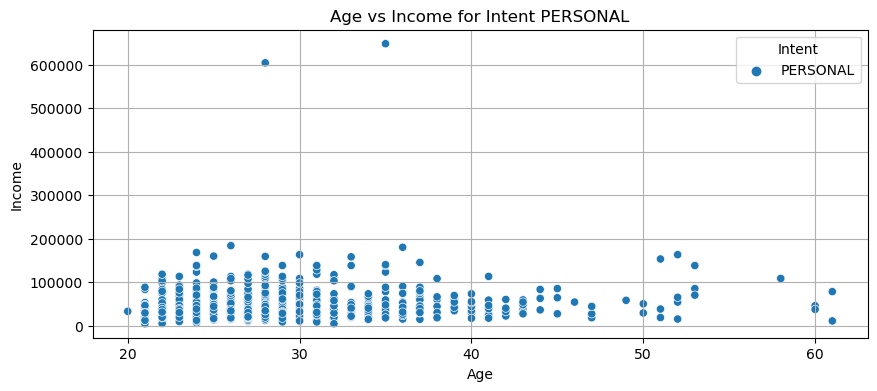

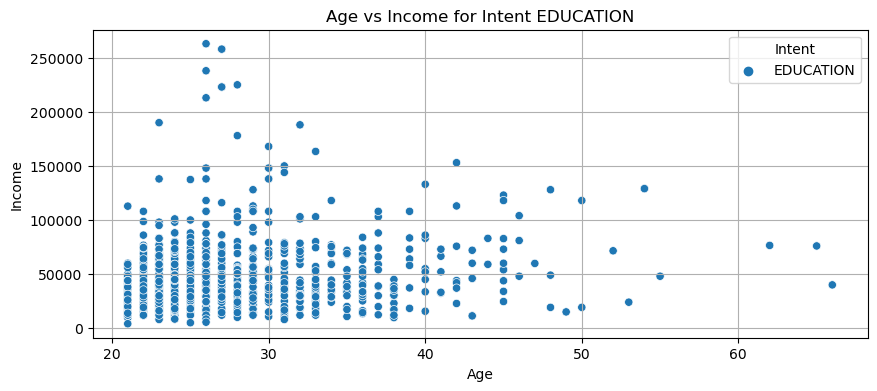

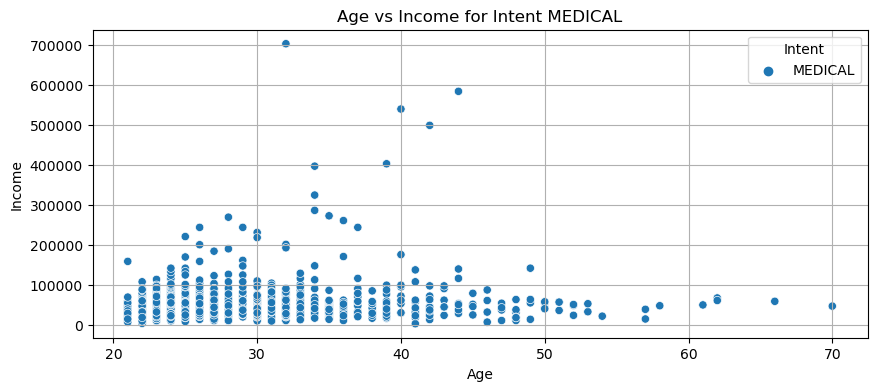

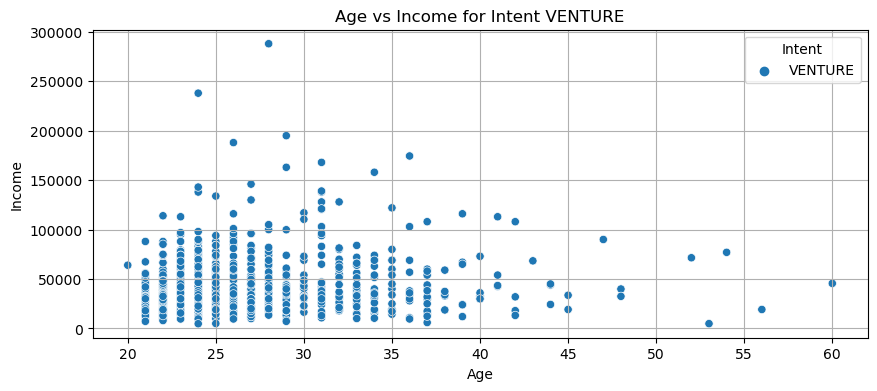

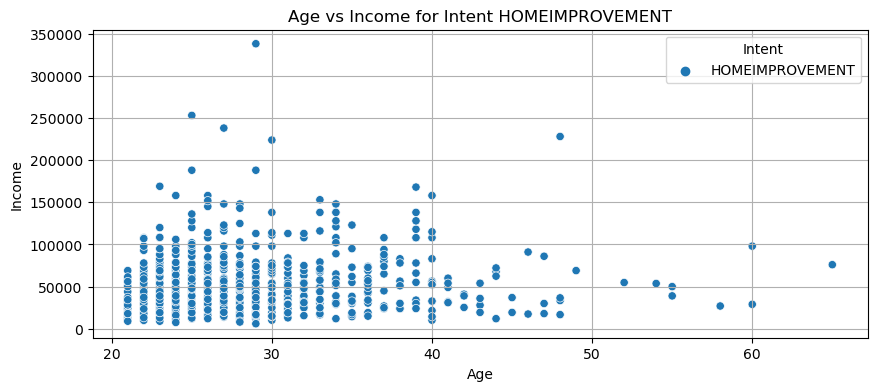

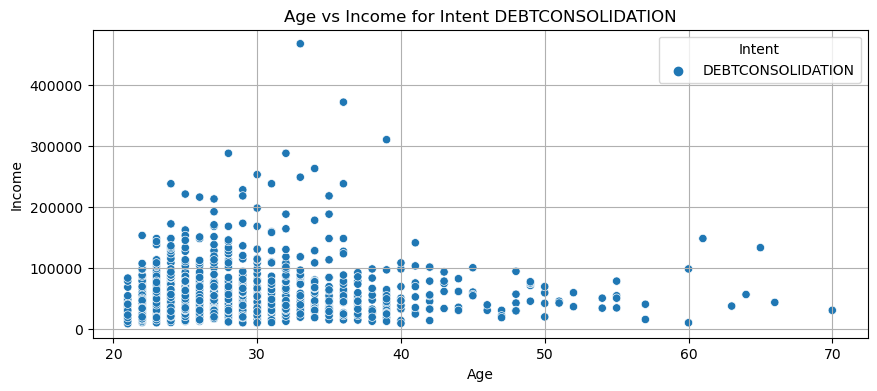

In [79]:
intents = df['Intent'].unique()

for intent in intents:
    subset = df[(df['Intent'] == intent) & (df['Status'] == 1)]
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=subset['Age'], y=subset['Income'], hue=subset['Intent'], data=subset)
    plt.title(f'Age vs Income for Intent {intent}')
    plt.grid(True)
    plt.show()


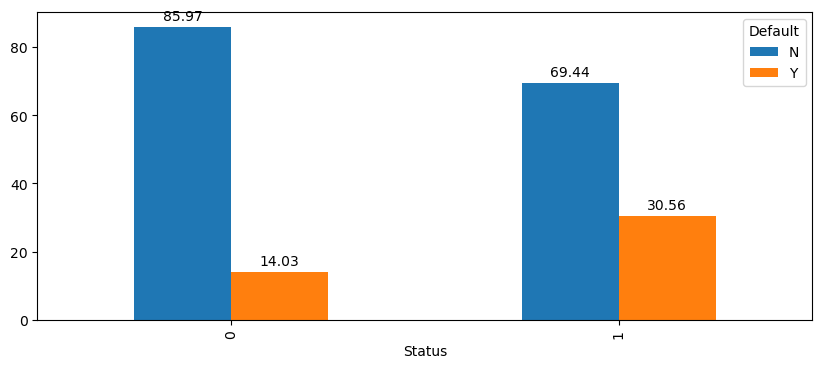

In [80]:
plt.figure(figsize=(10, 4))
plt.title('')
plt.ylabel('')
bars = (pd.crosstab(df['Status'],df['Default'],normalize='index')*100).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

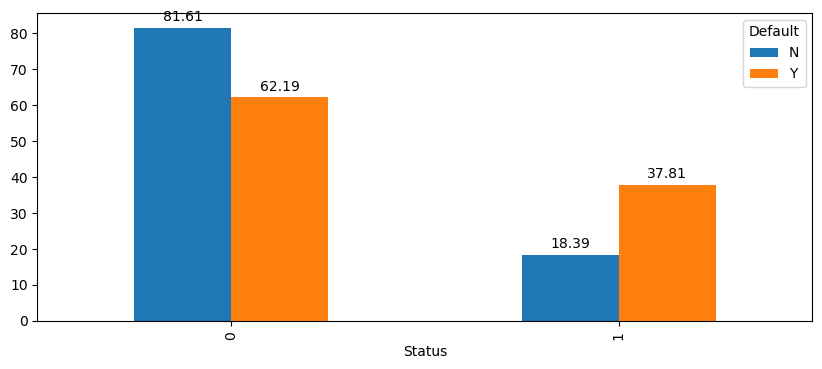

In [81]:
plt.figure(figsize=(10, 4))
plt.title('')
plt.ylabel('')
bars = (pd.crosstab(df['Status'],df['Default'],normalize='columns')*100).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

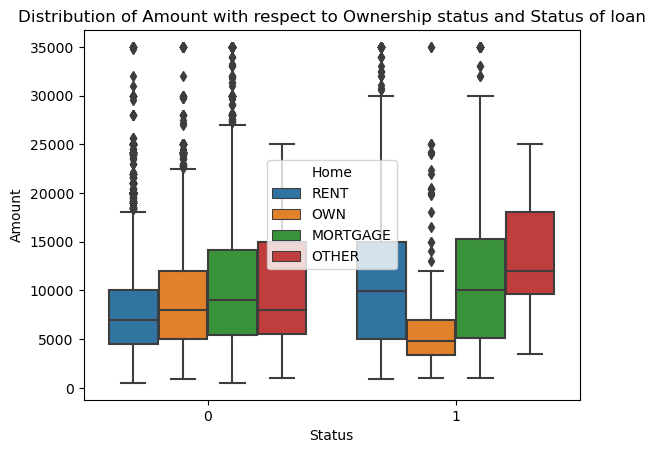

In [126]:
sns.boxplot(x='Status',y='Amount',hue='Home', data=df)
plt.title('Distribution of Amount with respect to Ownership status and Status of loan')
plt.show()

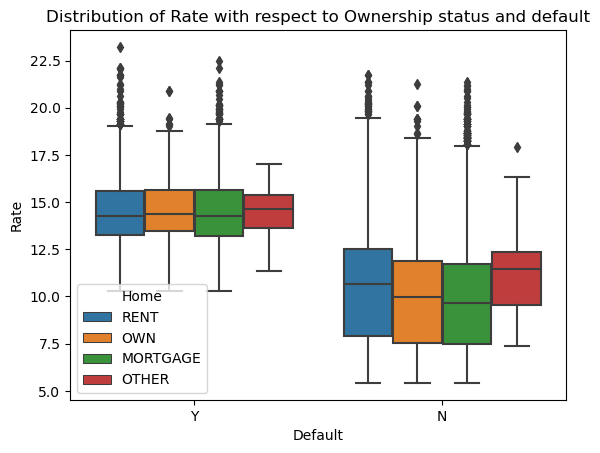

In [127]:
sns.boxplot(x='Default',y='Rate',hue='Home', data=df)
plt.title('Distribution of Rate with respect to Ownership status and default')
plt.show()

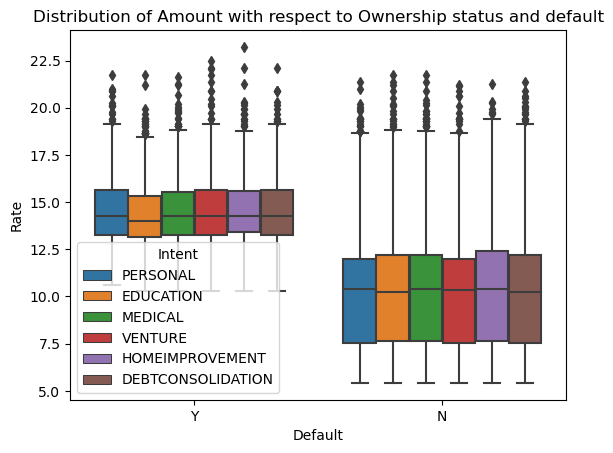

In [128]:
sns.boxplot(x='Default',y='Rate',hue='Intent', data=df)
plt.title('Distribution of Amount with respect to Ownership status and default')
plt.show()

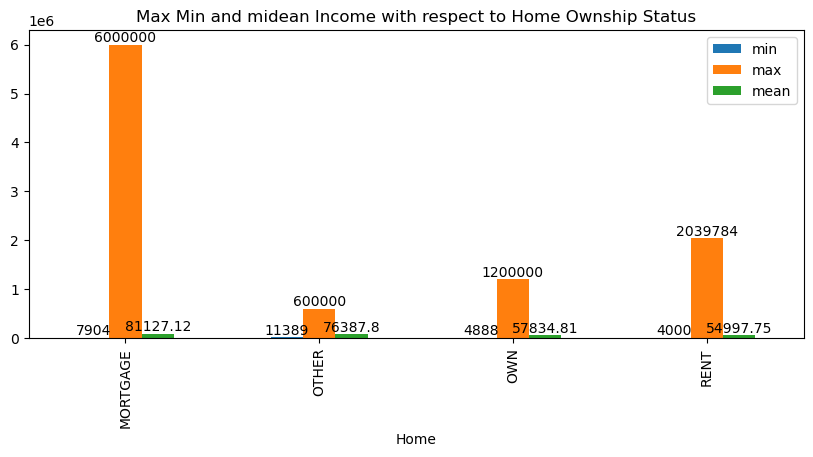

In [129]:
plt.figure(figsize=(10, 4))
plt.title('Max Min and midean Income with respect to Home Ownship Status')
plt.ylabel('')
bars=df.groupby('Home')['Income'].agg(['min', 'max', 'mean']).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()


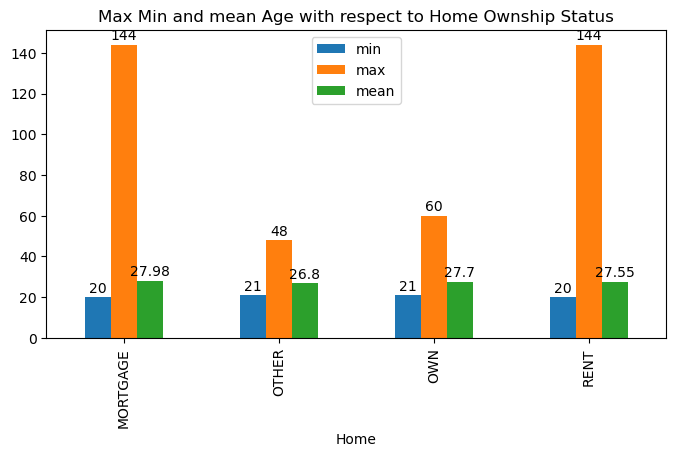

In [130]:
plt.figure(figsize=(8, 4))
plt.title('Max Min and mean Age with respect to Home Ownship Status')
plt.ylabel('')
bars=df.groupby('Home')['Age'].agg(['min', 'max', 'mean']).plot(kind='bar',ax=plt.gca())
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

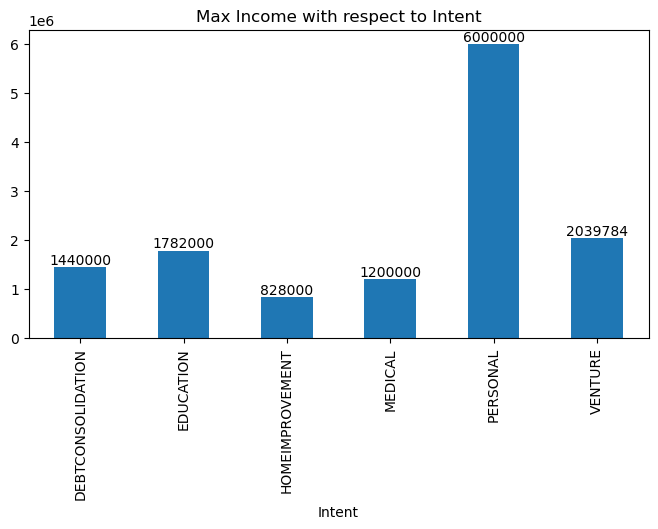

In [131]:
plt.figure(figsize=(8, 4))
plt.title('Max Income with respect to Intent')
plt.ylabel('')
bars=df.groupby('Intent')['Income'].max().plot(kind='bar',ax=plt.gca())
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

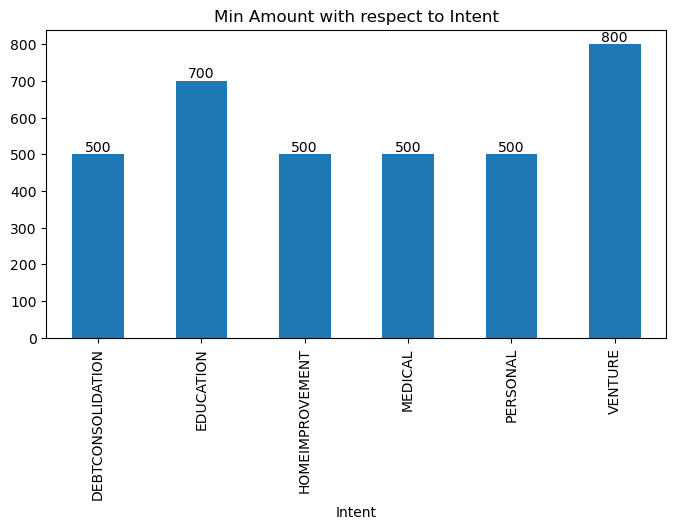

In [132]:
plt.figure(figsize=(8, 4))
plt.title('Min Amount with respect to Intent')
plt.ylabel('')
bars=df.groupby('Intent')['Amount'].min().plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()


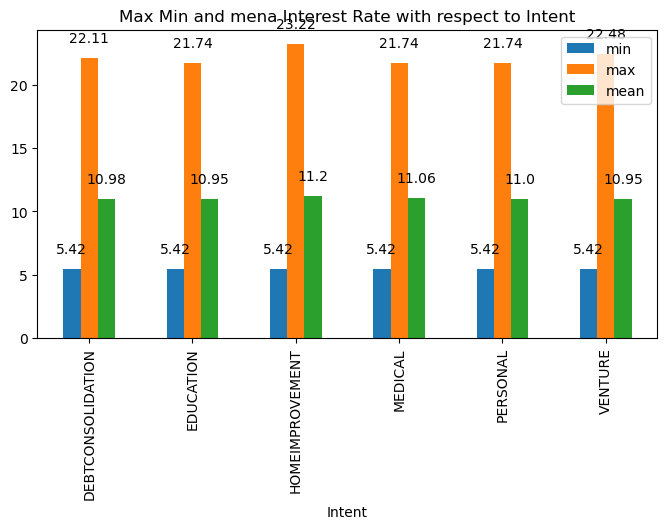

In [133]:
plt.figure(figsize=(8, 4))
plt.title('Max Min and mena Interest Rate with respect to Intent')
plt.ylabel('')
bars=df.groupby('Intent')['Rate'].agg(['min','max','mean']).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

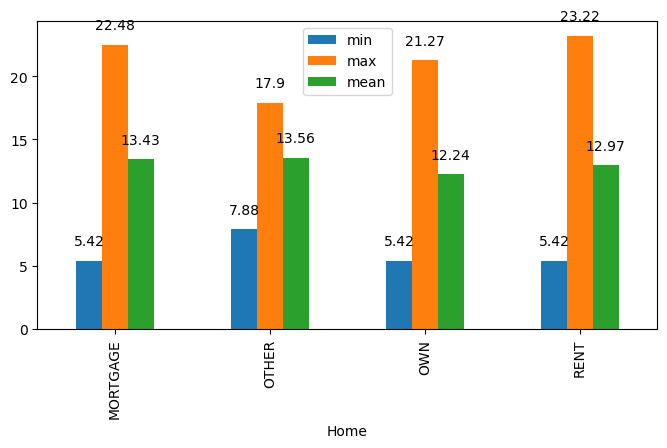

In [90]:
plt.figure(figsize=(8, 4))
plt.title('')
plt.ylabel('')
bars=df[df['Status']==1].groupby('Home')['Rate'].agg(['min', 'max', 'mean']).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

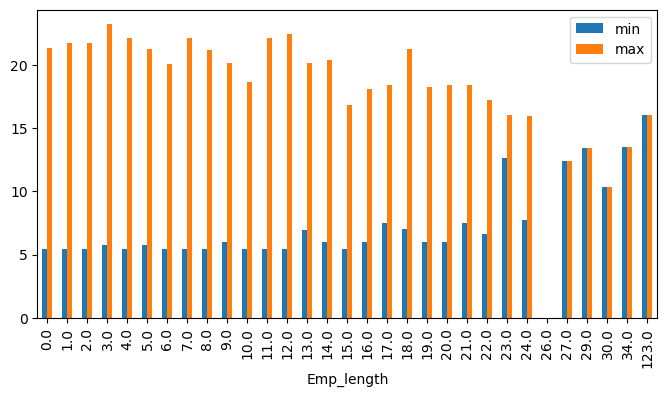

In [91]:
plt.figure(figsize=(8, 4))
plt.title('')
plt.ylabel('')
bars=df[df['Status']==1].groupby('Emp_length')['Rate'].agg(['min', 'max']).plot(kind='bar',ax=plt.gca())


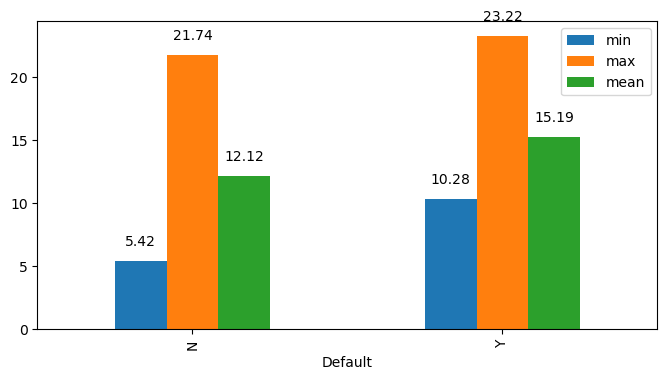

In [92]:
plt.figure(figsize=(8, 4))
plt.title('')
plt.ylabel('')
bars=df[df['Status']==1].groupby('Default')['Rate'].agg(['min', 'max','mean']).plot(kind='bar',ax=plt.gca())
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

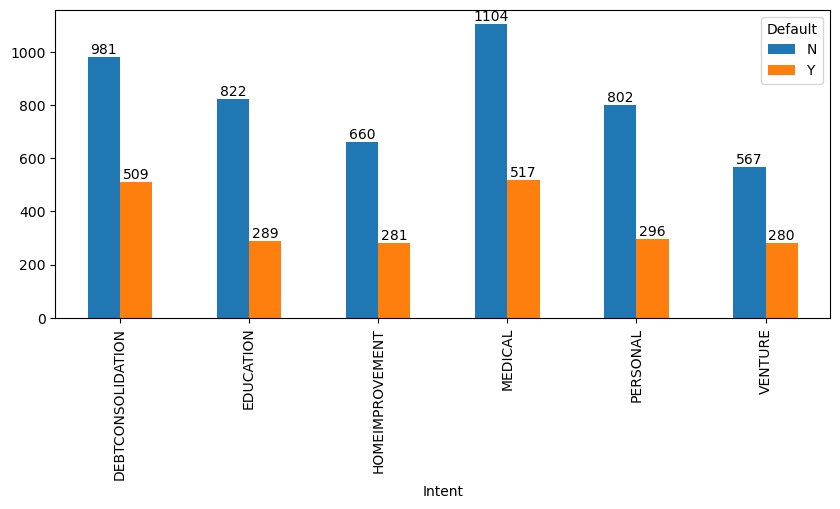

In [93]:
plt.figure(figsize=(10, 4))
plt.title('')
plt.ylabel('')
bars = (pd.crosstab(df[df['Status']==1]['Intent'], df[df['Status']==1]['Default'])).plot(kind='bar',ax=plt.gca())

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

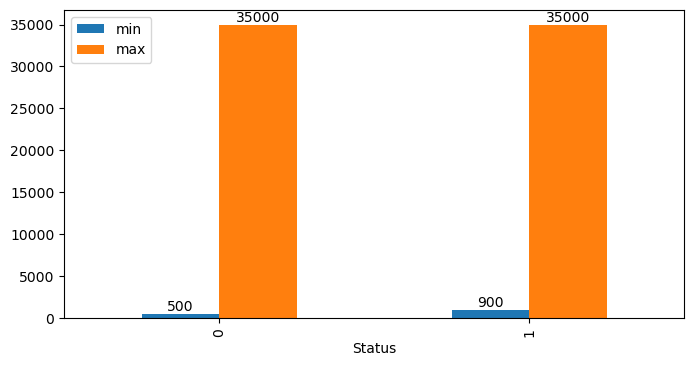

In [94]:
plt.figure(figsize=(8, 4))
plt.title('')
plt.ylabel('')
bars=df.groupby('Status')['Amount'].agg(['min', 'max']).plot(kind='bar',ax=plt.gca())
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

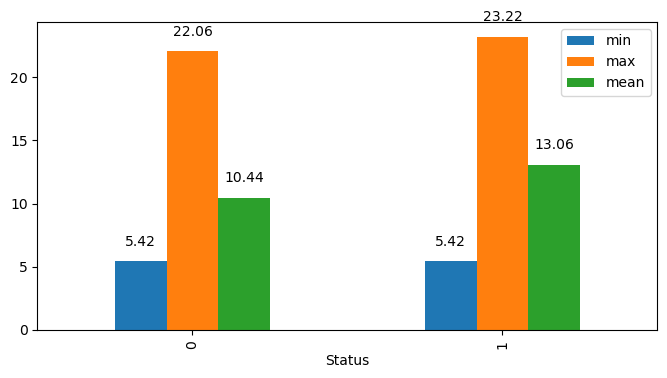

In [95]:
plt.figure(figsize=(8, 4))
plt.title('')
plt.ylabel('')
bars=df.groupby('Status')['Rate'].agg(['min', 'max', 'mean']).plot(kind='bar',ax=plt.gca())
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

# Model Building 

In [134]:
df = pd.get_dummies(df)

# Decision tree regressor for missing value imputation.

In [135]:
# Sample data with missing values
data_with_missing = df.iloc[::,1:].copy()

# Split data into sets with missing values and without
train = data_with_missing.dropna()
test = data_with_missing[np.isnan(data_with_missing['Emp_length']) | np.isnan(data_with_missing['Rate'])]  # Assuming 'Column3' and 'Column5' are the column names for indexes 3 and 5

selected_columns = [0,1,3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19]

train_X = train.iloc[:, selected_columns]
test_X = test.iloc[:, selected_columns]


# Train the regressor for 'Column3'
regressor_column3 = DecisionTreeRegressor()
regressor_column3.fit(train_X, train['Emp_length'])
predicted_column3 = regressor_column3.predict(test_X)

# Train the regressor for 'Column5'
regressor_column5 = DecisionTreeRegressor()
regressor_column5.fit(train_X, train['Rate'])
predicted_column5 = regressor_column5.predict(test_X)


# For 'Emp_length'
missing_indices_emp_length = test[pd.isna(test['Emp_length'])].index
test_X_emp_length = test.loc[missing_indices_emp_length, train_X.columns]
predicted_column3 = regressor_column3.predict(test_X_emp_length)
data_with_missing.loc[missing_indices_emp_length, 'Emp_length'] = predicted_column3

# For 'Rate'
missing_indices_rate = test[pd.isna(test['Rate'])].index
test_X_rate = test.loc[missing_indices_rate, train_X.columns]
predicted_column5 = regressor_column5.predict(test_X_rate)
data_with_missing.loc[missing_indices_rate, 'Rate'] = predicted_column5


print(data_with_missing)

       Age  Income  Emp_length  Amount   Rate  Status  Percent_income  \
0       22   59000       123.0   35000  16.02       1            0.59   
1       21    9600         5.0    1000  11.14       0            0.10   
2       25    9600         1.0    5500  12.87       1            0.57   
3       23   65500         4.0   35000  15.23       1            0.53   
4       24   54400         8.0   35000  14.27       1            0.55   
...    ...     ...         ...     ...    ...     ...             ...   
32576   57   53000         1.0    5800  13.16       0            0.11   
32577   54  120000         4.0   17625   7.49       0            0.15   
32578   65   76000         3.0   35000  10.99       1            0.46   
32579   56  150000         5.0   15000  11.48       0            0.10   
32580   66   42000         2.0    6475   9.99       0            0.15   

       Cred_length  Home_MORTGAGE  Home_OTHER  Home_OWN  Home_RENT  \
0                3              0           0        

In [136]:
# Defining X and Y
y = data_with_missing['Status']
credit_predictors = data_with_missing.drop(['Status'], axis=1)
X = credit_predictors.select_dtypes(exclude=['object'])

In [138]:
# train test split
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.2, random_state = 2)

In [139]:
# Random forest classifier 
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)
rf_preds = rf_model.predict(val_X)

In [103]:
# Model accuracy
rf_acerto = accuracy_score(val_y, rf_preds)
rf_acerto
acerto = 100*rf_acerto
acerto
print(f" Accuracy of Random Forest is {acerto.round(2)} %")

 Accuracy of Random Forest is 91.7 %


In [140]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating a DMatrix for performance boost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters (you can tune these)
param = {
    'max_depth': 6,
    'eta': 0.5,
    'objective': 'multi:softprob',
    'num_class': 2}  #you have 2 classes for classification

num_round = 30
bst = xgb.train(param, dtrain, num_round)

# Predictions
preds = bst.predict(dtest)
pred_labels = np.argmax(preds, axis=1)

accuracy = accuracy_score(y_test, pred_labels)
print("Accuracy of xgboost: %f" % (accuracy))


Accuracy of xgboost: 0.920055
